In [2]:
import pandas as pd
import scipy.stats as stats

In [3]:
#heart_rate = pd.read_csv("HEARTRATE/HEARTRATE_1645282552968.csv")
heart_rate_auto = pd.read_csv("HEARTRATE_AUTO/HEARTRATE_AUTO_1645282554071.csv")

In [4]:
heart_rate_auto.head()

,date,time,heartRate
0,2021-06-09,18:26,48
1,2021-06-09,18:39,95
2,2021-06-09,18:41,85
3,2021-06-09,18:57,78
4,2021-06-09,18:58,85


In [5]:
heart_rate_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226687 entries, 0 to 226686
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       226687 non-null  object
 1   time       226687 non-null  object
 2   heartRate  226687 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.2+ MB


In [6]:
heart_rate_auto["datetime"] = heart_rate_auto["date"] + " " + heart_rate_auto["time"]
heart_rate_auto["datetime"] = pd.to_datetime(heart_rate_auto["datetime"], format="%Y-%m-%d %H:%M")

In [7]:
heart_rate_auto.drop("date", inplace=True, axis=1)
heart_rate_auto.drop("time", inplace=True, axis=1)
heart_rate_auto.head()

,heartRate,datetime
0,48,2021-06-09 18:26:00
1,95,2021-06-09 18:39:00
2,85,2021-06-09 18:41:00
3,78,2021-06-09 18:57:00
4,85,2021-06-09 18:58:00


In [8]:
heart_rate_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226687 entries, 0 to 226686
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   heartRate  226687 non-null  int64         
 1   datetime   226687 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.5 MB


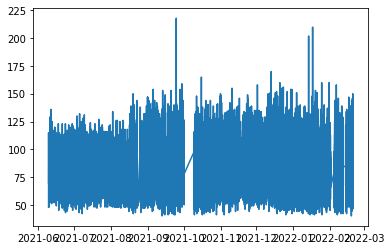

In [9]:
# %matplotlib widget

import matplotlib.pyplot as plt
# import matplotlib.dates

# from datetime import datetime

# x = matplotlib.dates.date2num(heart_rate_auto["datetime"])
# y = matplotlib.dates.date2num(heart_rate_auto["heartRate"])

plt.plot(heart_rate_auto["datetime"], heart_rate_auto["heartRate"])


<AxesSubplot:>

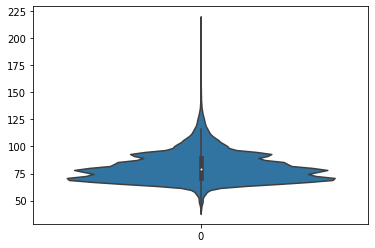

In [10]:
import seaborn as sns
%matplotlib inline
sns.violinplot(data = heart_rate_auto["heartRate"])

<AxesSubplot:>

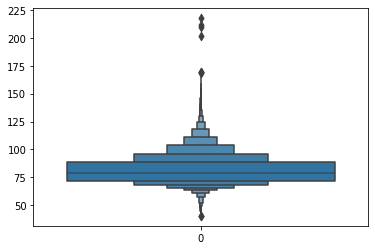

In [11]:
import seaborn as sns
%matplotlib inline
sns.boxenplot(data = heart_rate_auto["heartRate"])

In [12]:
heart_rate_auto.describe()

,heartRate
count,226687.000000
mean,80.929109
std,13.358222
min,40.000000
25%,71.000000
50%,79.000000
75%,89.000000
max,218.000000


In [13]:
stats.median_abs_deviation(heart_rate_auto["heartRate"])

9.0

In [14]:
pd.isna(heart_rate_auto["heartRate"]).sum()

0

<AxesSubplot:xlabel='heartRate', ylabel='Density'>

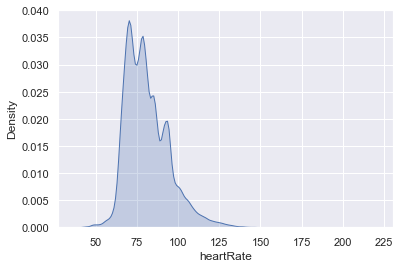

In [15]:
%matplotlib inline
sns.set(style="darkgrid")
sns.kdeplot(heart_rate_auto["heartRate"], shade=True)

In [16]:
print(stats.skew(heart_rate_auto["heartRate"],bias=False), stats.kurtosis(heart_rate_auto["heartRate"]))

1.012554849416985 1.7360804329327753


In [17]:
round(stats.trim_mean(heart_rate_auto["heartRate"], 0.1), 2)

79.65